In [3]:
pip install pandas numpy scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA



In [5]:
df=pd.read_csv(r'/home/jihed/projects/svm/default of credit card clients.tsv',header=1,sep='\t')

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.rename({'default payment next month':'DEFAULT'},axis='columns',inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.drop('ID',axis='columns',inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [10]:
df['SEX'].unique()

array([2, 1])

In [11]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [12]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [13]:
len(df.loc[(df['EDUCATION']==0 )| (df['MARRIAGE']==0)])

68

In [14]:
len(df)

30000

In [15]:
df_no_missing=df.loc[(df['EDUCATION']!=0 )& (df['MARRIAGE']!=0)]

In [16]:
len(df_no_missing)

29932

In [17]:
df_no_default=df_no_missing[df_no_missing['DEFAULT']==0]
df_default=df_no_missing[df_no_missing['DEFAULT']==1]

In [18]:
    df_no_default_downsampled=resample(df_no_default,replace=False,n_samples=1000,random_state=42)
    len(df_no_default_downsampled)


1000

In [19]:
df_default_downsampled=resample(df_default,replace=False,n_samples=1000,random_state=42)
len(df_default_downsampled)

1000

In [20]:
df_downsample=pd.concat([df_no_default_downsampled,df_default_downsampled])
len(df_downsample)

2000

In [21]:
X=df_downsample.drop('DEFAULT',axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [22]:
y=df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

In [23]:
pd.get_dummies(X,columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,True,False,False
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,True,False,False
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,True,False,False
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,False,True,False
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,True,False,False


In [24]:
X_encoded=pd.get_dummies(X,columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,False,True,False,False,False,False,False,False,False,False
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,False,False,False,True,False,False,False,False,False,False
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,False,False,False,True,False,False,False,False,False,False
22974,210000,32,355,975,410,0,0,0,979,412,...,False,True,False,False,False,False,False,False,False,False
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,False,False,False,True,False,False,False,False,False,False


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

In [26]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)


SVC(random_state=42)

In [27]:
plot_confusion_matrix(clf_svm,X_test_sclaed,y_test,values_format='d',display_labels=["Did not default","Defaulted"])

NameError: name 'plot_confusion_matrix' is not defined

In [28]:
param_grid=[
    {'C':[0.5,1,10,100],
     'gamma':['scale',1,0.1,0.01,0.001,0.0001],
     'kernel':['rbf']},
     ]

optimal_params=GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0)
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [29]:
clf_svm=SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=100, gamma=0.001, random_state=42)

In [30]:
len(df_downsample.columns)

24

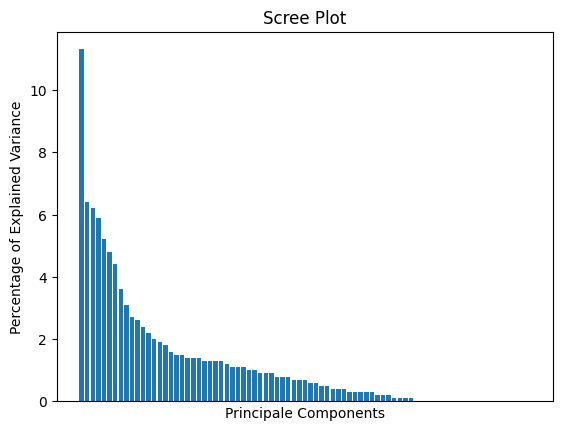

In [31]:
pca=PCA()
X_train_pca=pca.fit_transform(X_train_scaled)
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=[str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var)

plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principale Components')
plt.title('Scree Plot')
plt.show()

In [32]:
train_pc1_coords=X_train_pca[:,0]
train_pc2_coords=X_train_pca[:,1]

pca_train_scaled=scale(np.column_stack((train_pc1_coords,train_pc2_coords)))
param_grid=[
    {'C':[1,10,100,1000],
     'gamma':['scale',1,0.1,0.01,0.001,0.0001],
     'kernel':['rbf']},
     ]

optimal_params=GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0)
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


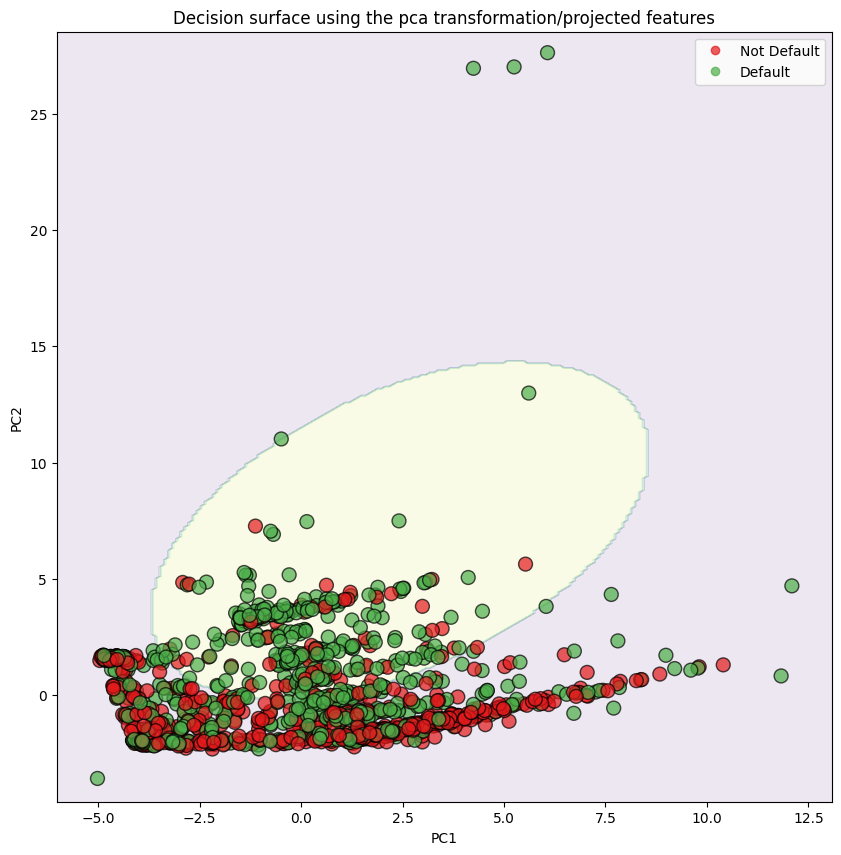

In [36]:
clf_svm=SVC(random_state=42,C=1000,gamma=0.001)
clf_svm.fit(pca_train_scaled,y_train)

X_test_pca=pca.transform(X_train_scaled)
test_pc1_coords=X_test_pca[:,0]
test_pc2_coords=X_test_pca[:,1]
x_min=test_pc1_coords.min()-1
x_max=test_pc1_coords.max()+1
y_min=test_pc2_coords.min()-1
y_max=test_pc2_coords.max()+1
xx,yy=np.meshgrid(np.arange(start=x_min,stop=x_max,step=0.1),
                  np.arange(start=y_min,stop=y_max,step=0.1))
Z=clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))
Z=Z.reshape(xx.shape)

fig,ax=plt.subplots(figsize=(10,10))
ax.contourf(xx,yy,Z,alpha=0.1)

cmap=colors.ListedColormap(['#e41a1c','#4daf4a'])
scatter=ax.scatter(test_pc1_coords,test_pc2_coords,c=y_train,
                   cmap=cmap,
                   s=100,
                   edgecolors='k',
                   alpha=0.7)

legend=ax.legend(scatter.legend_elements()[0],
                 scatter.legend_elements()[1],
                 loc="upper right")
legend.get_texts()[0].set_text("Not Default")
legend.get_texts()[1].set_text("Default")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the pca transformation/projected features')
plt.show()
                  